## Week 2: Understanding the Question and Getting Data

In [1]:
import pandas as pd

#### Import data

In [2]:
hospice_df = pd.read_csv('data/Hospice_General_Information.csv')
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
0,11500,BAPTIST HOSPICE,301 INTERSTATE PARK,NaN,MONTGOMERY,AL,36109,Montgomery,(334) 395-5000,4,Other,03/23/1984
1,11501,SOUTHERNCARE NEW BEACON N. BIRMINGHAM,"4735 NORREL DRIVE, SUITE 129",NaN,TRUSSVILLE,AL,35173,Jefferson,(205) 939-8799,4,For-Profit,05/24/1984


##### Keep only the rows where facilities are in TN

In [3]:
hospice_df = hospice_df.loc[hospice_df.State == 'TN']
hospice_df.head(2)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


##### Keep only the Facility Name, Address Line 1, City, State, County Name, CMS Region, Ownership Type, and Cerfification Date columns. Make all column names lower case and without spaces.

In [4]:
# Facility Name, Address Line 1, City, State, County Name, CMS Region, Ownership Type, and Cerfification Date
hospice_df.columns = ['ccn', 'facility', 'address', 'address2', 'city', 'state', 'zip', 'county', 'phone', 'region',
                     'owner_type', 'cert_date']
hospice_df.head(2)

,ccn,facility,address,address2,city,state,zip,county,phone,region,owner_type,cert_date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984
2890,441502,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",NaN,MEMPHIS,TN,38134,Shelby,(901) 516-1600,4,Non-Profit,08/31/1984


In [5]:
hospice_df.drop(columns = ['ccn', 'address2', 'zip', 'phone'], inplace = True)
hospice_df.head(2)

,facility,address,city,state,county,region,owner_type,cert_date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984


##### Examine the first 5 rows and the last five rows of the TN hospice data.

In [6]:
print('top', hospice_df.head())
print('-----------------------')
print('bottom', hospice_df.tail())

top                                 facility                            address  \
2889                   ALIVE HOSPICE INC                1718 PATTERSON ROAD   
2890          METHODIST ALLIANCE HOSPICE  6400 SHELBY VIEW DRIVE, SUITE 101   
2891          HOSPICE OF CHATTANOOGA INC                 4411 OAKWOOD DRIVE   
2892               AMEDISYS HOSPICE CARE          6570 STAGE ROAD SUITE 110   
2893  NORTHCREST HOME HEALTH AND HOSPICE               212 NORTHCREST DRIVE   

             city state     county  region  owner_type   cert_date  
2889    NASHVILLE    TN   Davidson       4  Non-Profit  04/10/1984  
2890      MEMPHIS    TN     Shelby       4  Non-Profit  08/31/1984  
2891  CHATTANOOGA    TN   Hamilton       4  Non-Profit  06/30/1986  
2892     BARTLETT    TN     Shelby       4  For-Profit  02/09/1987  
2893  SPRINGFIELD    TN  Robertson       4       Other  07/13/1987  
-----------------------
bottom                                   facility                        address  \

##### print the dimensions of the data

In [7]:
hospice_df.shape

(56, 8)

In [8]:
hospice_df.loc[hospice_df.county=="Davidson"]

,facility,address,city,state,county,region,owner_type,cert_date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2901,ASERACARE HOSPICE - NASHVILLE,"441 DONELSON PIKE, SUITE 400",NASHVILLE,TN,Davidson,4,For-Profit,03/19/1992
2909,AVALON HOSPICE,"2525 PERIMETER PLACE DRIVE, SUITE 105",NASHVILLE,TN,Davidson,4,For-Profit,06/20/1994
2913,GENTIVA HOSPICE,1400 DONELSON PIKE SUITE B5,NASHVILLE,TN,Davidson,4,For-Profit,06/30/1994
2929,CARIS HEALTHCARE,2525 PERIMETER PLACE DRIVE SUITE 131,NASHVILLE,TN,Davidson,4,For-Profit,06/01/2004
2934,ADORATION HOSPICE,545 MAINSTREAM DRIVE SUITE 412,NASHVILLE,TN,Davidson,4,For-Profit,12/02/2005
2940,ENCOMPASS HOSPICE OF TENNESSEE,828 ROYAL PARKWAY SUITE 113,NASHVILLE,TN,Davidson,4,For-Profit,06/16/2010
2943,"AMEDISYS HOSPICE, AN ADVENTA COMPANY",400 ROYAL PARKWAY,NASHVILLE,TN,Davidson,4,Other,01/05/2016


#### Cancer Death Data
##### Create a DataFrame, cancer_df, from the cancer CSV file.
##### Look at the head and tail of the DataFrame

In [9]:
cancer_df = pd.read_csv('data/cancer_deaths.csv',skiprows= 4, nrows= 97)
cancer_df.head()

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,1.3
3,Scott County,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,0.1
4,Cheatham County,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,0.3


In [10]:
list(cancer_df.columns)

['County',
 ' FIPS',
 'Met Healthy People Objective of 161.4?',
 'Age-Adjusted Death Rate - deaths per 100,000',
 'Lower 95% Confidence Interval',
 'Upper 95% Confidence Interval',
 'Average Annual Count',
 'Recent Trend',
 'Recent 5-Year Trend in Death Rates',
 'Lower 95% Confidence Interval.1',
 'Upper 95% Confidence Interval.1']

##### Print the shape of the cancer data

In [11]:
cancer_df.shape

(97, 11)

##### Keep and rename all columns

In [12]:
cancer_df.columns = ['county', 'fips', 'hpo', 'aadr', 'lower_95', 'upper_95', 'aac',
                     'recent_trend', 'recent_5_trend', 'lower_95.1', 'upper_95.1']
cancer_df.head(2)

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,upper_95.1
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,-1.2
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,-1.5


#### Census data
##### Create a DataFrame, pop_df, from the census CSV file
##### Look at the head and the tail

In [13]:
pop_df = pd.read_csv('data/PEP_2017_PEPAGESEX.csv', skiprows = 1)
pop_df.head()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
0,0500000US47001,47001,"Anderson County, Tennessee",75129,36308,38821,75094,36288,38806,75112,...,44.8,43.3,41.4,44.8,43.3,41.5,45.1,43.2,41.2,45.0
1,0500000US47003,47003,"Bedford County, Tennessee",45058,22357,22701,45056,22356,22700,45086,...,38.4,37.2,35.9,38.5,37.5,36.2,38.8,37.5,36.2,38.9
2,0500000US47005,47005,"Benton County, Tennessee",16489,8073,8416,16491,8074,8417,16511,...,48.3,46.6,45.2,48.0,47.1,45.7,48.4,47.4,46.0,48.7
3,0500000US47007,47007,"Bledsoe County, Tennessee",12876,6964,5912,12872,6962,5910,12882,...,46.3,43.4,41.7,46.5,43.5,41.9,46.4,43.9,42.1,47.3
4,0500000US47009,47009,"Blount County, Tennessee",123010,59559,63451,123100,59596,63504,123213,...,44.1,43.4,42.1,44.5,43.7,42.2,44.9,43.8,42.3,45.1


In [14]:
pop_df.tail()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
90,0500000US47181,47181,"Wayne County, Tennessee",17021,9402,7619,17027,9404,7623,16987,...,45.8,42.6,39.8,46.5,42.7,39.9,46.7,43.1,40.0,47.4
91,0500000US47183,47183,"Weakley County, Tennessee",35021,17159,17862,35015,17157,17858,35042,...,39.2,37.6,36.0,39.2,37.9,36.2,39.6,38.3,36.6,40.1
92,0500000US47185,47185,"White County, Tennessee",25841,12640,13201,25836,12637,13199,25821,...,44.0,42.7,41.0,44.2,42.8,41.2,44.3,42.8,41.3,44.4
93,0500000US47187,47187,"Williamson County, Tennessee",183182,89336,93846,183252,89371,93881,184130,...,39.7,39.0,38.2,39.7,39.0,38.3,39.7,39.0,38.3,39.7
94,0500000US47189,47189,"Wilson County, Tennessee",113993,55834,58159,114057,55863,58194,114677,...,41.1,40.2,39.2,41.1,40.0,39.0,40.9,39.9,39.0,40.8


In [15]:
print(pop_df.shape)

(95, 993)


In [16]:
april_data = [col for col in pop_df.columns if col.startswith('April')]
pop_df = pop_df.drop(april_data, axis = 1)

##### Print the shape

In [17]:
pop_df.shape

(95, 795)

## Week 3: Cleaning Data

### Work on cleaning and wrangling pop_df

##### Only keep 31 columns particular to population over 50, due to cancer rates

In [18]:
list(pop_df.columns)

['Id',
 'Id2',
 'Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Male; Total',
 'Population Estimate (as of July 1) - 2010 - Female; Total',
 'Population Estimate (as of July 1) - 2011 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2011 - Male; Total',
 'Population Estimate (as of July 1) - 2011 - Female; Total',
 'Population Estimate (as of July 1) - 2012 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2012 - Male; Total',
 'Population Estimate (as of July 1) - 2012 - Female; Total',
 'Population Estimate (as of July 1) - 2013 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2013 - Male; Total',
 'Population Estimate (as of July 1) - 2013 - Female; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Male; Total',
 'Population Estimate (as of July 1) - 2014 - Females; Total',
 'Population Estimate (as of J

##### Made new data frame pop_df1 to keep only the 31 columns I wanted. Need to keep years 2010, 2014 and 2017

In [19]:
pop_df1 = pop_df[['Geography','Population Estimate (as of July 1) - 2010 - Both Sexes; Total','Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
                 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total','Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)',
                 'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)','Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)',
                 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years','Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
                 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years','Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
                 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years','Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 75 to 79 years',
                 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 80 to 84 years','Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 85 years and over',
                 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years','Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
                 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years','Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 65 to 69 years',
                 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 70 to 74 years','Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 75 to 79 years',
                 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 80 to 84 years','Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over',
                 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years','Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
                 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years','Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years',
                 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years','Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years',
                 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years','Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over']]

In [20]:
pop_df1.shape

(95, 31)

In [21]:
list(pop_df1.columns)

['Geography',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 75 to 79 years',
 'Population Estimate (as of July 1) - 2010 - Both Se

In [22]:
pop_df1.rename(columns = {"Geography":"county"}, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
pop_df1.columns

Index(['county',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Tot

In [24]:
pop_df1.county=pop_df1.county.str.replace(', Tennessee', '')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
pop_df1.head(5)

,county,Population Estimate (as of July 1) - 2010 - Both Sexes; Total,Population Estimate (as of July 1) - 2014 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years,Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years,Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years,...,Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 80 to 84 years,Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over
0,Anderson County,75112,75131,76257,42.6,43.3,43.2,5850,5577,5068,...,1779,2211,5296,5643,5442,4871,3765,2501,1785,2173
1,Bedford County,45086,46259,48117,36.5,37.2,37.5,3043,2646,2515,...,729,679,3239,3143,2705,2501,1988,1321,811,640
2,Benton County,16511,16176,15986,45.6,46.7,47.4,1259,1224,1363,...,399,409,1179,1206,1246,1166,1075,717,418,415
3,Bledsoe County,12882,14419,14717,42.5,43.3,43.9,1005,903,951,...,275,209,1185,1197,995,892,732,510,267,264
4,Blount County,123213,125827,129929,41.5,43.1,43.8,9152,8657,8310,...,2591,2656,9522,9615,9116,8382,6808,4663,2939,2786


In [26]:
print(pop_df1.head(5))

            county  \
0  Anderson County   
1   Bedford County   
2    Benton County   
3   Bledsoe County   
4    Blount County   

   Population Estimate (as of July 1) - 2010 - Both Sexes; Total  \
0                                              75112               
1                                              45086               
2                                              16511               
3                                              12882               
4                                             123213               

   Population Estimate (as of July 1) - 2014 - Both Sexes; Total  \
0                                              75131               
1                                              46259               
2                                              16176               
3                                              14419               
4                                             125827               

   Population Estimate (as of July 1) - 2017 - Bo

#### Merging Data Frames

In [27]:
pop_and_cancer_df = cancer_df.merge(pop_df1, how='outer', on='county')

In [28]:
pop_and_cancer_df.shape

(97, 41)

In [29]:
hospice_df.head(5)

,facility,address,city,state,county,region,owner_type,cert_date
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984
2891,HOSPICE OF CHATTANOOGA INC,4411 OAKWOOD DRIVE,CHATTANOOGA,TN,Hamilton,4,Non-Profit,06/30/1986
2892,AMEDISYS HOSPICE CARE,6570 STAGE ROAD SUITE 110,BARTLETT,TN,Shelby,4,For-Profit,02/09/1987
2893,NORTHCREST HOME HEALTH AND HOSPICE,212 NORTHCREST DRIVE,SPRINGFIELD,TN,Robertson,4,Other,07/13/1987


In [30]:
pop_and_cancer_df.county=pop_and_cancer_df.county.str.replace(' County', '')

In [31]:
hospice_per_county = hospice_df.county.value_counts().to_dict()

In [32]:
for county in pop_and_cancer_df.county:
    if county in hospice_per_county:
        continue
    else: 
        hospice_per_county[county] = 0

In [33]:
hospice_per_county

{'Davidson': 8,
 'Knox': 5,
 'Hamilton': 5,
 'Shelby': 5,
 'Carroll': 2,
 'Bradley': 2,
 'Williamson': 2,
 'Madison': 2,
 'Washington': 2,
 'Robertson': 2,
 'Montgomery': 1,
 'Rutherford': 1,
 'Blount': 1,
 'Coffee': 1,
 'Hancock': 1,
 'Putnam': 1,
 'Wayne': 1,
 'Carter': 1,
 'McMinn': 1,
 'Fayette': 1,
 'Hamblen': 1,
 'Obion': 1,
 'Claiborne': 1,
 'Sumner': 1,
 'Cocke': 1,
 'Sullivan': 1,
 'Perry': 1,
 'Cumberland': 1,
 'Fentress': 1,
 'Henry': 1,
 'Lincoln': 1,
 'Tennessee': 0,
 'United States': 0,
 'Trousdale': 0,
 'Scott': 0,
 'Cheatham': 0,
 'Union': 0,
 'Benton': 0,
 'Houston': 0,
 'Sequatchie': 0,
 'Grainger': 0,
 'Lake': 0,
 'Campbell': 0,
 'Stewart': 0,
 'Overton': 0,
 'Marion': 0,
 'White': 0,
 'Johnson': 0,
 'Meigs': 0,
 'Humphreys': 0,
 'Macon': 0,
 'Grundy': 0,
 'Tipton': 0,
 'Polk': 0,
 'Clay': 0,
 'Decatur': 0,
 'Henderson': 0,
 'Lauderdale': 0,
 'McNairy': 0,
 'Marshall': 0,
 'Lewis': 0,
 'Cannon': 0,
 'Gibson': 0,
 'Dickson': 0,
 'Hickman': 0,
 'Warren': 0,
 'Unicoi': 

In [34]:
len(hospice_per_county)

97

In [35]:
len(pop_and_cancer_df)

97

In [36]:
pop_and_cancer_df['hospice_per_county']=[hospice_per_county[county] for county in pop_and_cancer_df.county]

In [37]:
pop_and_cancer_df

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over,hospice_per_county
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,132.0,639.0,616.0,551.0,471.0,388.0,254.0,146.0,129.0,0
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,...,335.0,1558.0,1426.0,1393.0,1187.0,1002.0,698.0,373.0,356.0,0
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,...,395.0,3280.0,3224.0,2724.0,2248.0,1550.0,963.0,594.0,461.0,0
5,Claiborne,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,...,508.0,2262.0,2218.0,2309.0,2071.0,1713.0,1124.0,740.0,529.0,1
6,Hancock,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,...,129.0,451.0,513.0,522.0,522.0,327.0,233.0,161.0,122.0,1
7,Union,47173,No,234.2,206.1,265.3,53,stable,-0.5,-1.2,...,265.0,1439.0,1588.0,1365.0,1221.0,951.0,650.0,348.0,321.0,0
8,Benton,47005,No,233.9,207.1,263.6,59,stable,0.3,-0.4,...,409.0,1179.0,1206.0,1246.0,1166.0,1075.0,717.0,418.0,415.0,0
9,Houston,47083,No,227.4,188.9,272.1,26,stable,0.4,-0.6,...,174.0,555.0,621.0,572.0,546.0,427.0,329.0,184.0,189.0,0


### Exploratory Data Analysis

###### Find which columns have missing values? How many? What should you do about it?

In [38]:
pop_and_cancer_df.isnull().sum()

county                                                                               0
fips                                                                                 0
hpo                                                                                  0
aadr                                                                                 0
lower_95                                                                             0
upper_95                                                                             0
aac                                                                                  0
recent_trend                                                                         0
recent_5_trend                                                                       0
lower_95.1                                                                           0
upper_95.1                                                                           0
Population Estimate (as of July 1) - 2010 -

In [39]:
pop_and_cancer_df.shape

(97, 42)

##### Find the average death rate from cancer for counties in TN?

In [40]:
pop_and_cancer_df.describe()

,fips,aadr,lower_95,upper_95,aac,recent_5_trend,lower_95.1,upper_95.1,Population Estimate (as of July 1) - 2010 - Both Sexes; Total,Population Estimate (as of July 1) - 2014 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over,hospice_per_county
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,97.00000
mean,46618.804124,195.430928,175.520619,217.591753,6332.195876,-0.712371,-1.535052,0.130928,66904.021053,68842.178947,...,1167.526316,4725.642105,4786.389474,4445.694737,3833.557895,2968.010526,1998.863158,1291.136842,1241.084211,0.57732
std,4783.920591,23.589388,20.441323,30.494220,59522.674382,0.992289,1.583709,0.808337,125893.866158,130411.224371,...,2002.716298,8364.067423,8472.943999,7757.733879,6284.313596,4417.454111,2909.587459,1962.451884,2103.014395,1.25694
min,0.000000,123.200000,93.900000,134.900000,12.000000,-6.700000,-13.800000,-2.900000,5073.000000,5068.000000,...,114.000000,376.000000,394.000000,394.000000,377.000000,267.000000,212.000000,128.000000,115.000000,0.00000
25%,47047.000000,181.000000,166.100000,198.400000,48.000000,-1.000000,-1.600000,-0.300000,18102.000000,17871.500000,...,332.500000,1267.000000,1270.500000,1316.000000,1148.500000,955.500000,642.000000,376.500000,342.500000,0.00000
50%,47095.000000,194.200000,176.000000,215.400000,82.000000,-0.600000,-1.200000,0.100000,31821.000000,31250.000000,...,573.000000,2178.000000,2218.000000,2127.000000,1901.000000,1559.000000,1064.000000,710.000000,621.000000,0.00000
75%,47143.000000,211.100000,186.600000,239.400000,152.000000,-0.200000,-1.000000,0.500000,56534.500000,56319.000000,...,1161.500000,4093.000000,4258.500000,4054.000000,3673.500000,3130.500000,2153.000000,1322.000000,1265.000000,1.00000
max,47999.000000,265.500000,219.000000,319.100000,586354.000000,1.300000,0.300000,2.300000,928552.000000,938434.000000,...,13579.000000,59532.000000,60997.000000,56177.000000,45022.000000,30529.000000,19812.000000,13297.000000,14257.000000,8.00000


In [41]:
list(pop_and_cancer_df.columns)

['county',
 'fips',
 'hpo',
 'aadr',
 'lower_95',
 'upper_95',
 'aac',
 'recent_trend',
 'recent_5_trend',
 'lower_95.1',
 'upper_95.1',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years',
 'Population 

In [42]:
import matplotlib.pyplot as plt

##### What does the distribution of the recent_5year_trend of deaths from cancer look like for TN counties?

(array([ 1.,  0.,  0.,  2.,  1.,  3.,  9., 54., 24.,  3.]),
 array([-6.7, -5.9, -5.1, -4.3, -3.5, -2.7, -1.9, -1.1, -0.3,  0.5,  1.3]),
 <a list of 10 Patch objects>)

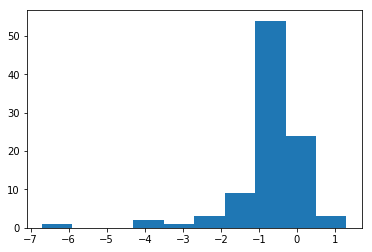

In [43]:
plt.hist(pop_and_cancer_df['recent_5_trend'])

##### What does the distribution of counties meeting and not meeting the 2020 Healthy People Objective target of 161.4 cancer deaths per 100,000 people look like?

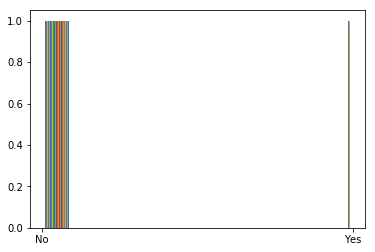

In [44]:
plt.hist(pop_and_cancer_df['hpo'])
plt.show()

##### Find the 4 counties that have more than 2 hospice facilities? Any surprises?

In [45]:
#df.loc[df['shield'] > 6, ['max_speed']]
pop_and_cancer_df.loc[pop_and_cancer_df['hospice_per_county'] > 2, ['county']]

,county
48,Shelby
66,Davidson
79,Knox
83,Hamilton


##### Find the 5 counties with the highest death rate per 100K people

In [46]:
#df.nlargest(3, 'a')
pop_and_cancer_df.nlargest(5, 'aadr')

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years,Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over,hospice_per_county
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,132.0,639.0,616.0,551.0,471.0,388.0,254.0,146.0,129.0,0
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,...,335.0,1558.0,1426.0,1393.0,1187.0,1002.0,698.0,373.0,356.0,0
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,...,395.0,3280.0,3224.0,2724.0,2248.0,1550.0,963.0,594.0,461.0,0
5,Claiborne,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,...,508.0,2262.0,2218.0,2309.0,2071.0,1713.0,1124.0,740.0,529.0,1
6,Hancock,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,...,129.0,451.0,513.0,522.0,522.0,327.0,233.0,161.0,122.0,1


##### Create 3 new features in pop_and_cancer: percent_pop_over_50_2010, percent_pop_over_50_2014, percent_pop_over_50_2017

In [47]:
pop_and_cancer_df['over50_2010'] = pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 75 to 79 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 80 to 84 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 85 years and over']
pop_and_cancer_df['over50_2014'] = pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 65 to 69 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 70 to 74 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 75 to 79 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 80 to 84 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over']
pop_and_cancer_df['over50_2017'] = pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years'] + pop_and_cancer_df['Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over']

In [48]:
pop_and_cancer_df = pop_and_cancer_df.drop(['Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 75 to 79 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 80 to 84 years',
 'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 85 years and over',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 65 to 69 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 70 to 74 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 75 to 79 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 80 to 84 years',
 'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years',
 'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over'], axis = 1)
pop_and_cancer_df.head()

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2010 - Both Sexes; Total,Population Estimate (as of July 1) - 2014 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),hospice_per_county,over50_2010,over50_2014,over50_2017
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,7874.0,7993.0,10083.0,39.7,40.7,35.6,0,2752.0,2978.0,3194.0
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,...,22227.0,21986.0,21989.0,38.2,38.9,39.6,0,7330.0,7728.0,7993.0
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,...,39122.0,39604.0,40330.0,39.4,40.5,40.9,0,12647.0,14101.0,15044.0


In [49]:
#df.rename(index=str, columns={"A": "a", "B": "c"})
pop_and_cancer_df = pop_and_cancer_df.rename(index = str, columns = {"Population Estimate (as of July 1) - 2010 - Both Sexes; Total" : "pop_total_2010",
                                                "Population Estimate (as of July 1) - 2014 - Both Sexes; Total" : "pop_total_2014",
                                                "Population Estimate (as of July 1) - 2017 - Both Sexes; Total" : "pop_total_2017"})

In [50]:
pop_and_cancer_df.columns

Index(['county', 'fips', 'hpo', 'aadr', 'lower_95', 'upper_95', 'aac',
       'recent_trend', 'recent_5_trend', 'lower_95.1', 'upper_95.1',
       'pop_total_2010', 'pop_total_2014', 'pop_total_2017',
       'Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)',
       'Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)',
       'hospice_per_county', 'over50_2010', 'over50_2014', 'over50_2017'],
      dtype='object')

In [51]:
pop_and_cancer_df['percent_pop_over_50_2010'] = pop_and_cancer_df.over50_2010 / pop_and_cancer_df.pop_total_2010
pop_and_cancer_df['percent_pop_over_50_2014'] = pop_and_cancer_df.over50_2014 / pop_and_cancer_df.pop_total_2014
pop_and_cancer_df['percent_pop_over_50_2017'] = pop_and_cancer_df.over50_2017 / pop_and_cancer_df.pop_total_2017
pop_and_cancer_df.head(5)

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),hospice_per_county,over50_2010,over50_2014,over50_2017,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,39.7,40.7,35.6,0,2752.0,2978.0,3194.0,0.349505,0.372576,0.316771
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,...,38.2,38.9,39.6,0,7330.0,7728.0,7993.0,0.329779,0.351496,0.363500
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,...,39.4,40.5,40.9,0,12647.0,14101.0,15044.0,0.323271,0.356050,0.373023


##### in 2017, for which two counties was the population over age 50 greater than half of the total population?

In [52]:
#df.loc[df['shield'] > 6, ['max_speed']]
pop_and_cancer_df.loc[pop_and_cancer_df['percent_pop_over_50_2017'] > .5]

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),hospice_per_county,over50_2010,over50_2014,over50_2017,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
81,Cumberland,47035,No,174.4,162.5,187.0,182,falling,-0.8,-1.3,...,48.4,50.0,51.4,1,26931.0,28920.0,30402.0,0.479225,0.500035,0.514608
93,Pickett,47137,Yes,158.7,123.3,203.9,15,stable,-0.5,-1.8,...,47.4,48.8,50.4,0,2345.0,2451.0,2567.0,0.462251,0.483623,0.506012


##### in 2017, for which five counties was the population over age 50 less than a third of the total population?

In [53]:
pop_and_cancer_df.loc[pop_and_cancer_df['percent_pop_over_50_2017'] < .33]

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),hospice_per_county,over50_2010,over50_2014,over50_2017,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,39.7,40.7,35.6,0,2752.0,2978.0,3194.0,0.349505,0.372576,0.316771
48,Shelby,47157,No,195.0,190.8,199.2,1767,falling,-1.1,-1.2,...,34.6,35.1,35.6,5,268799.0,290161.0,299623.0,0.289482,0.309197,0.319782
57,Montgomery,47125,No,188.4,177.7,199.5,247,falling,-1.0,-1.5,...,30.0,30.3,30.8,1,38782.0,43670.0,47852.0,0.223956,0.231084,0.239042
66,Davidson,47037,No,184.7,179.8,189.7,1137,falling,-1.5,-1.7,...,34.0,34.4,34.4,8,176005.0,195492.0,202902.0,0.280275,0.291642,0.293532
86,Rutherford,47149,No,170.3,162.5,178.4,380,falling,-1.4,-1.7,...,32.3,33.3,33.7,1,63681.0,76046.0,85835.0,0.241447,0.263492,0.270639


##### Create a scatterplot to show the relationship between cancer deaths and the percentage of population over age 50 in TN counties. Use the 2017 population data. Be sure to label axes and add a title.

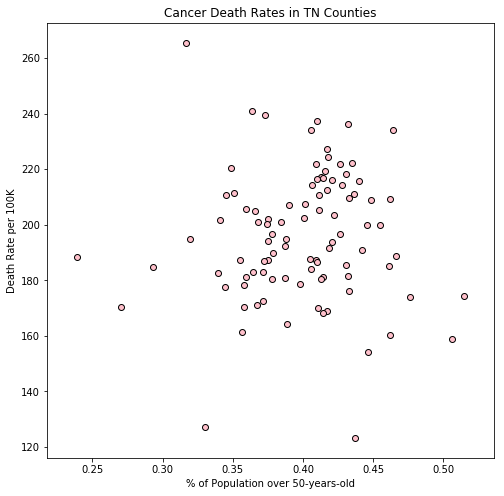

In [54]:
plt.figure(figsize = (8,8))
plt.scatter(pop_and_cancer_df.percent_pop_over_50_2017, pop_and_cancer_df.aadr, 
            color = 'pink', edgecolor = 'black')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Death Rate per 100K')
plt.title('Cancer Death Rates in TN Counties')
plt.show()

##### Create another new feature, normalized_hospice_rate in pop_and_cancer. Divide the count of hospices by the 2017 total population and multiply the result by 100,000.

In [55]:
pop_and_cancer_df['normalized_hospice_rate'] = pop_and_cancer_df.hospice_per_county/pop_and_cancer_df.pop_total_2017 * 100000

In [56]:
pop_and_cancer_df.head(20)

,county,fips,hpo,aadr,lower_95,upper_95,aac,recent_trend,recent_5_trend,lower_95.1,...,Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),hospice_per_county,over50_2010,over50_2014,over50_2017,percent_pop_over_50_2010,percent_pop_over_50_2014,percent_pop_over_50_2017,normalized_hospice_rate
0,Tennessee,47999,No,185.4,184.0,186.8,13933,falling,-1.4,-1.5,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,0,No,163.5,163.3,163.7,586354,falling,-1.5,-1.6,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trousdale,47169,No,265.5,219.0,319.1,24,stable,0.0,-1.3,...,40.7,35.6,0,2752.0,2978.0,3194.0,0.349505,0.372576,0.316771,0.000000
3,Scott,47151,No,241.0,214.5,270.0,63,stable,-0.5,-1.1,...,38.9,39.6,0,7330.0,7728.0,7993.0,0.329779,0.351496,0.363500,0.000000
4,Cheatham,47021,No,239.6,217.8,263.0,97,stable,-0.6,-1.4,...,40.5,40.9,0,12647.0,14101.0,15044.0,0.323271,0.356050,0.373023,0.000000
5,Claiborne,47025,No,237.3,216.4,259.8,100,stable,-0.1,-0.7,...,42.7,43.2,1,12114.0,12567.0,12966.0,0.376024,0.398585,0.410200,3.163656
6,Hancock,47067,No,236.2,193.1,287.1,22,stable,0.4,-0.8,...,43.5,44.3,1,2721.0,2770.0,2851.0,0.400029,0.418176,0.431970,15.151515
7,Union,47173,No,234.2,206.1,265.3,53,stable,-0.5,-1.2,...,41.7,42.7,0,6769.0,7373.0,7883.0,0.354064,0.388257,0.405462,0.000000
8,Benton,47005,No,233.9,207.1,263.6,59,stable,0.3,-0.4,...,46.7,47.4,0,7159.0,7327.0,7422.0,0.433590,0.452955,0.464281,0.000000
9,Houston,47083,No,227.4,188.9,272.1,26,stable,0.4,-0.6,...,43.1,43.5,0,3306.0,3345.0,3423.0,0.391382,0.407132,0.416778,0.000000


##### Create a scatterplot to examine the relationship between population over 50 and the normalized hospice rate in TN counties.

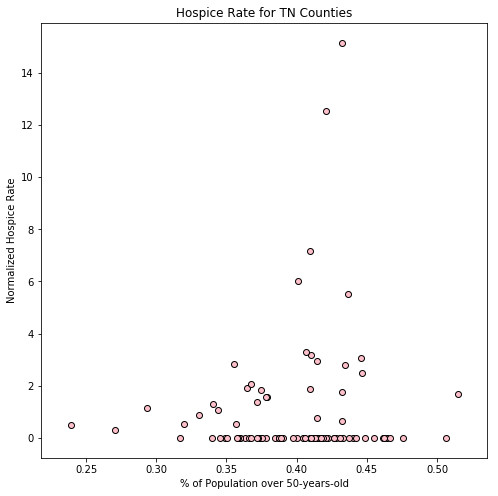

In [57]:
plt.figure(figsize = (8,8))
plt.scatter(pop_and_cancer_df.percent_pop_over_50_2017, pop_and_cancer_df.normalized_hospice_rate, 
            color = 'pink', edgecolor = 'black')
plt.xlabel('% of Population over 50-years-old')
plt.ylabel('Normalized Hospice Rate')
plt.title('Hospice Rate for TN Counties')
plt.show()

##### Use seaborn to create a boxplot normalized hospice rates, with nested grouping by the Healthy People cancer goal categories.

In [58]:
import seaborn as sns

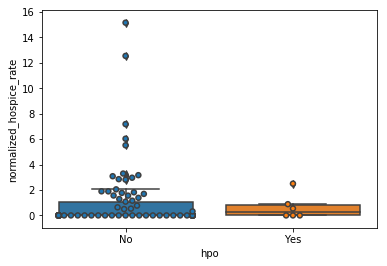

In [66]:
sns.boxplot(x = "hpo", y = "normalized_hospice_rate", data = pop_and_cancer_df, linewidth = 1.5)
sns.swarmplot(x = "hpo", y = "normalized_hospice_rate", data = pop_and_cancer_df, linewidth = 1.5)